In [1]:
import pandas as pd
import glob, os
pd.set_option('float_format', '{:f}'.format)

dateparse = lambda x: pd.datetime.strptime(x, '%Y%m%d')

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
def concatenate_stock(exchange):
    path = r'C:\Users\parsh\Desktop\Exchange/data/US_stocks_csv/{}'.format(exchange)
    all_files = glob.glob(os.path.join(path, "*.csv"))  
    
    df_from_each_file = (df_parse(f) for f in all_files)
    
    
    concatenated_df = pd.concat(df_from_each_file, ignore_index=True)

    concatenated_df['Exchange'] = exchange
    print(exchange + ' is merged')
    return concatenated_df


def df_parse(f):
    stock_df = pd.read_csv(f, parse_dates=['Date'],  date_parser=dateparse)
    
    stock_df['ATR1'] = abs (stock_df['High'] - stock_df['Low'])
    stock_df['ATR2'] = abs (stock_df['High'] - stock_df['Close'].shift())
    stock_df['ATR3'] = abs (stock_df['Close'].shift() - stock_df['Low'])

    stock_df['ATR'] = stock_df[['ATR1', 'ATR2', 'ATR3']].max(axis=1)
    
    stock_df['mean_stock_price'] = (stock_df['High'] - stock_df['Low'] ) /2 + stock_df['Low']
    
    stock_df['ATR_percent'] = stock_df['ATR'] / stock_df['mean_stock_price'] * 100
    stock_df.drop(['ATR','ATR1', 'ATR2', 'ATR3'], inplace=True, axis=1)
    return stock_df

In [3]:
exchange_list = ['AMEX', 'Delisted', 'NASDAQ', 'NYSE', 'NYSE Arca']

df_from_each_exchange = (concatenate_stock(exchange) for exchange in exchange_list)

In [4]:
concatenated_df = pd.concat(df_from_each_exchange, ignore_index=True)

AMEX is merged
Delisted is merged
NASDAQ is merged
NYSE is merged
NYSE Arca is merged


In [5]:
concatenated_df.set_index(pd.DatetimeIndex(concatenated_df['Date']), inplace=True)

In [7]:
concatenated_df.drop(['Date'], axis=1, inplace=True)

concatenated_df.sort_index(inplace=True, kind = 'heapsort')

In [8]:
concatenated_df.head()

,Ticker,Open,High,Low,Close,Volume,mean_stock_price,ATR_percent,Exchange
Date,,,,,,,,,
1985-01-02,GRIF-199511,3.750000,3.750000,3.750000,3.750000,960,3.750000,0.000000,Delisted
1985-01-02,AVGA-199001,11.750000,12.000000,11.625000,11.750000,4700,11.812500,3.174603,Delisted
1985-01-02,OHC.B-200302,4.931670,4.931670,4.931670,4.931670,715,4.931670,0.000000,Delisted
1985-01-02,GTR-198605,21.003150,21.003150,20.777310,20.777310,332,20.890230,1.081080,Delisted
1985-01-02,WORM-198806,1.062500,1.062500,1.062500,1.062500,66988,1.062500,0.000000,Delisted


In [9]:
def plot_full_volatility():

    concatenated_df_group = concatenated_df.groupby([concatenated_df.index.year, concatenated_df.index.month])['ATR_percent'].agg('mean')
    concatenated_df_group.plot(use_index=True, figsize=(12,10))

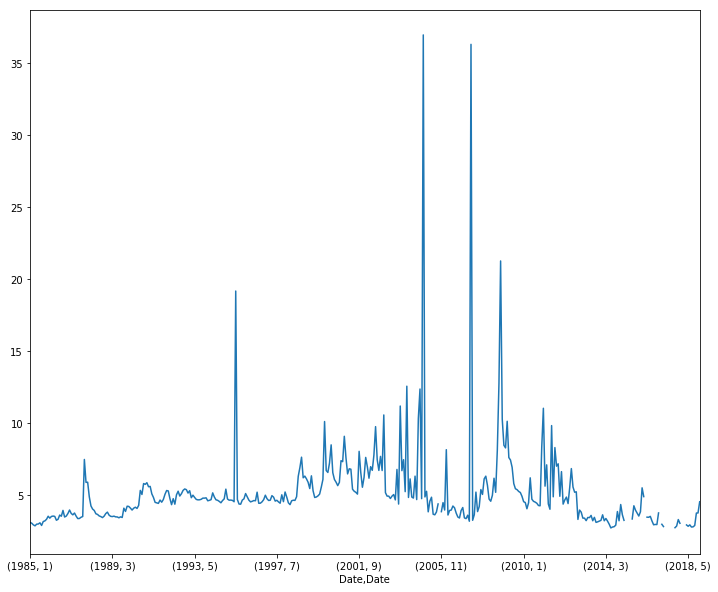

In [11]:
plot_full_volatility()

# Drop stocks less than 250 trade day

In [ ]:
count_stock= concatenated_df.groupby('Ticker').filter(lambda x: len(x) <= 250)

In [ ]:
ticker_to_drop = count_stock.groupby('Ticker')['Ticker'].unique()

In [ ]:
concatenated_df = concatenated_df[~concatenated_df['Ticker'].isin(ticker_to_drop.index)]

In [ ]:
concatenated_df.to_csv('stock_database.csv')